# EDA

In [1]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sidetable

In [2]:
pd.options.display.max_columns = None

Cargamos el archivo limpio 

In [3]:
df = pd.read_csv("../data/6.dataframe_analisis.csv", index_col = 0)
df.head(2)

,q1_edad,q2_genero,q3_país,q4_educacion,q5_ocupacion,q6_exp_tech,q8_l_recomendado,q11_tipo_plataforma,q20_i_actual,q21_tamanio_cia,q22_da_cia,q25_salario,q26_ppto_ml_cc,q33_bigdata_product,q35_h_i_negocios,q41_h_process_data,q7_l_utilizados,q9_adi,q14_h_viz,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q18_part_1,q18_part_2,q18_part_3,q18_part_4,q18_part_5,q18_part_6,q18_other,q27_a_part_1,q27_a_part_2,q27_a_part_3,q27_a_part_4,q27_a_part_5,q27_a_part_6,q27_a_part_7,q27_a_part_8,q27_a_part_9,q27_a_part_10,q27_a_part_11,q27_a_other,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q42_part_1,q42_part_2,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...",NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",$0 ($USD),NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN


#  Exploración de los nulos

In [4]:
df.shape

(25973, 89)

In [5]:
df_nulos = pd.DataFrame(df.isnull().sum()*100/df.shape[0])
df_nulos

,0
q1_edad,0.000000
q2_genero,0.000000
q3_país,0.000000
q4_educacion,0.000000
q5_ocupacion,0.000000
...,...
q42_part_8,69.287337
q42_part_9,87.101991
q42_part_10,92.318947
q42_part_11,96.122897


In [6]:
df.stb.missing()[50:70]

,missing,total,percent
q40_part_2,22945,25973,88.341739
q39_part_6,22908,25973,88.199284
q27_a_part_3,22831,25973,87.902822
q39_part_9,22806,25973,87.806568
q42_part_9,22623,25973,87.101991
q42_part_2,22532,25973,86.751627
q27_a_part_1,22252,25973,85.673584
q42_part_1,22226,25973,85.573480
q40_part_4,21977,25973,84.614792
q18_part_4,21600,25973,83.163285


In [7]:
df.dtypes

q1_edad         object
q2_genero       object
q3_país         object
q4_educacion    object
q5_ocupacion    object
                 ...  
q42_part_8      object
q42_part_9      object
q42_part_10     object
q42_part_11     object
q42_other       object
Length: 89, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25973 entries, 0 to 25972
Data columns (total 89 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   q1_edad              25973 non-null  object
 1   q2_genero            25973 non-null  object
 2   q3_país              25973 non-null  object
 3   q4_educacion         25973 non-null  object
 4   q5_ocupacion         25973 non-null  object
 5   q6_exp_tech          25973 non-null  object
 6   q8_l_recomendado     24940 non-null  object
 7   q11_tipo_plataforma  24720 non-null  object
 8   q20_i_actual         16325 non-null  object
 9   q21_tamanio_cia      16251 non-null  object
 10  q22_da_cia           16126 non-null  object
 11  q25_salario          15391 non-null  object
 12  q26_ppto_ml_cc       15183 non-null  object
 13  q33_bigdata_product  4656 non-null   object
 14  q35_h_i_negocios     2237 non-null   object
 15  q41_h_process_data   18489 non-null  object
 16  q7_l

# Variables categoricas

In [9]:
df_categoricas = df.select_dtypes(include = "object")
df_categoricas.head(2)

,q1_edad,q2_genero,q3_país,q4_educacion,q5_ocupacion,q6_exp_tech,q8_l_recomendado,q11_tipo_plataforma,q20_i_actual,q21_tamanio_cia,q22_da_cia,q25_salario,q26_ppto_ml_cc,q33_bigdata_product,q35_h_i_negocios,q41_h_process_data,q7_l_utilizados,q9_adi,q14_h_viz,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q18_part_1,q18_part_2,q18_part_3,q18_part_4,q18_part_5,q18_part_6,q18_other,q27_a_part_1,q27_a_part_2,q27_a_part_3,q27_a_part_4,q27_a_part_5,q27_a_part_6,q27_a_part_7,q27_a_part_8,q27_a_part_9,q27_a_part_10,q27_a_part_11,q27_a_other,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q42_part_1,q42_part_2,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...",NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",$0 ($USD),NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN


# Variables numericas

In [10]:
df_numericas = df.select_dtypes(include=np.number)
df_numericas.head(2)

# No existen variables numéricas 

""
index
0
1


# Principales estadisticos del dafaframe

In [11]:
# df_numericas.describe().T

In [12]:
df_categoricas.describe(include="object").T

,count,unique,top,freq
q1_edad,25973,11,25-29,4931
q2_genero,25973,5,Man,20598
q3_país,25973,66,India,7434
q4_educacion,25973,7,Master’s degree,10132
q5_ocupacion,25973,15,Student,6804
...,...,...,...,...
q42_part_8,7977,1,"Blogs (Towards Data Science, Analytics Vidhya,...",7977
q42_part_9,3350,1,"Journal Publications (peer-reviewed journals, ...",3350
q42_part_10,1995,1,"Slack Communities (ods.ai, kagglenoobs, etc)",1995
q42_part_11,1007,1,None,1007


# Valores unicos y su frecuencia en un DF

In [13]:
# Creamos un Dataframe a partir de un diccionario.
# Creamos dos listas para meter el nombre de la variable y los valores unicos
variable = []
n_uniques = []
for col in df_categoricas.columns: # Iteramos por las columnas de DF categoricas y apendeamos los distintos valores
    variable.append(col)
    n_uniques.append(df_categoricas[col].unique())
datos = {"variable": variable, "n_uniques": n_uniques} # Creamos el diccionario

In [14]:
# Creamos el Dataframe a partir del diccionario
df_valoresunicos = pd.DataFrame.from_dict(datos)

In [15]:
df_valoresunicos

,variable,n_uniques
0,q1_edad,"[50-54, 22-24, 45-49, 25-29, 18-21, 30-34, 40-..."
1,q2_genero,"[Man, Woman, Nonbinary, Prefer not to say, Pre..."
2,q3_país,"[India, Indonesia, Pakistan, Mexico, Russia, T..."
3,q4_educacion,"[Bachelor’s degree, Master’s degree, Doctoral ..."
4,q5_ocupacion,"[Other, Program/Project Manager, Software Engi..."
...,...,...
84,q42_part_8,"[Blogs (Towards Data Science, Analytics Vidhya..."
85,q42_part_9,"[Journal Publications (peer-reviewed journals,..."
86,q42_part_10,"[nan, Slack Communities (ods.ai, kagglenoobs, ..."
87,q42_part_11,"[nan, None]"


# Frecuencia en las columnas 

In [16]:
df.columns

Index(['q1_edad', 'q2_genero', 'q3_país', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q26_ppto_ml_cc', 'q33_bigdata_product', 'q35_h_i_negocios',
       'q41_h_process_data', 'q7_l_utilizados', 'q9_adi', 'q14_h_viz',
       'q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5',
       'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10',
       'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14',
       'q10_part_15', 'q10_part_16', 'q10_other', 'q18_part_1', 'q18_part_2',
       'q18_part_3', 'q18_part_4', 'q18_part_5', 'q18_part_6', 'q18_other',
       'q27_a_part_1', 'q27_a_part_2', 'q27_a_part_3', 'q27_a_part_4',
       'q27_a_part_5', 'q27_a_part_6', 'q27_a_part_7', 'q27_a_part_8',
       'q27_a_part_9', 'q27_a_part_10', 'q27_a_part_11', 'q27_a_other',
       'q39_part_1', 'q39_part_2', 'q39_part_3', 'q39_part_4'

In [17]:
df.stb.freq(['q1_edad'], thresh=80)

,q1_edad,count,percent,cumulative_count,cumulative_percent
0,25-29,4931,18.985100,4931,18.985100
1,18-21,4901,18.869595,9832,37.854695
2,22-24,4694,18.072614,14526,55.927309
3,30-34,3441,13.248373,17967,69.175682
4,35-39,2504,9.640781,20471,78.816463
5,others,5502,21.183537,25973,100.000000


# Outliers

No se puede hacer porque ahora mismo solo tenemos variables categóricas

Boxplot 

In [18]:
# fig, ax = plt.subplots(7, 1, figsize=(15,35))

# for i, column in enumerate(df_numericas):
    # sns.boxplot(x=df_numericas[column], data=df_numericas, ax=ax[i])
# plt.show()

Desviación estandar 

 # Relaciones entre variables  NUMERICAS

heatmap

Scatterplot

 # Relaciones entre variables CATÉGORICAS

Countplot

In [19]:
categoricas = list(df_categoricas.columns[0:5])
categoricas

['q1_edad', 'q2_genero', 'q3_país', 'q4_educacion', 'q5_ocupacion']

In [20]:
df_edades = df_categoricas["q1_edad"].value_counts()
df_edades

25-29    4931
18-21    4901
22-24    4694
30-34    3441
35-39    2504
40-44    1890
45-49    1375
50-54     964
55-59     592
60-69     553
70+       128
Name: q1_edad, dtype: int64

In [21]:
for i in df_edades.columns:
    #df[i].value_counts()
    print (df_edades[i].value_counts())


AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
def dicc_categoricas(lista_columnas, dataframe): 
    
    dicc_cat = {} # creamos un diccionario donde almacenaremos índices de los outliers
             
    for i in df_categoricas.columns:
        dicc_cat.setdefault(df_categoricas.i.value_counts())
                  
    return dicc_cat

In [ ]:
detectar_outliers(categoricas, df_categoricas)

AttributeError: 'DataFrame' object has no attribute 'i'

 # Relaciones entre variables CATÉGORICAS y NÚMERICAS

boxplot con el rango intercuartilico

# Countplot

- País
- Salario


In [49]:
def graficar_countrplot (df,lista):

    df_lista = df[lista]

    fig, axes = plt.subplots(1, len(lista), figsize=(25,6))

    for ax in fig.axes:
        ax.tick_params(labelrotation=90)

    for i in range(len(df_lista.columns)):
        sns.countplot(x = df_lista.columns[i], data = df, ax=axes[i]); 
    
    return plt.show();


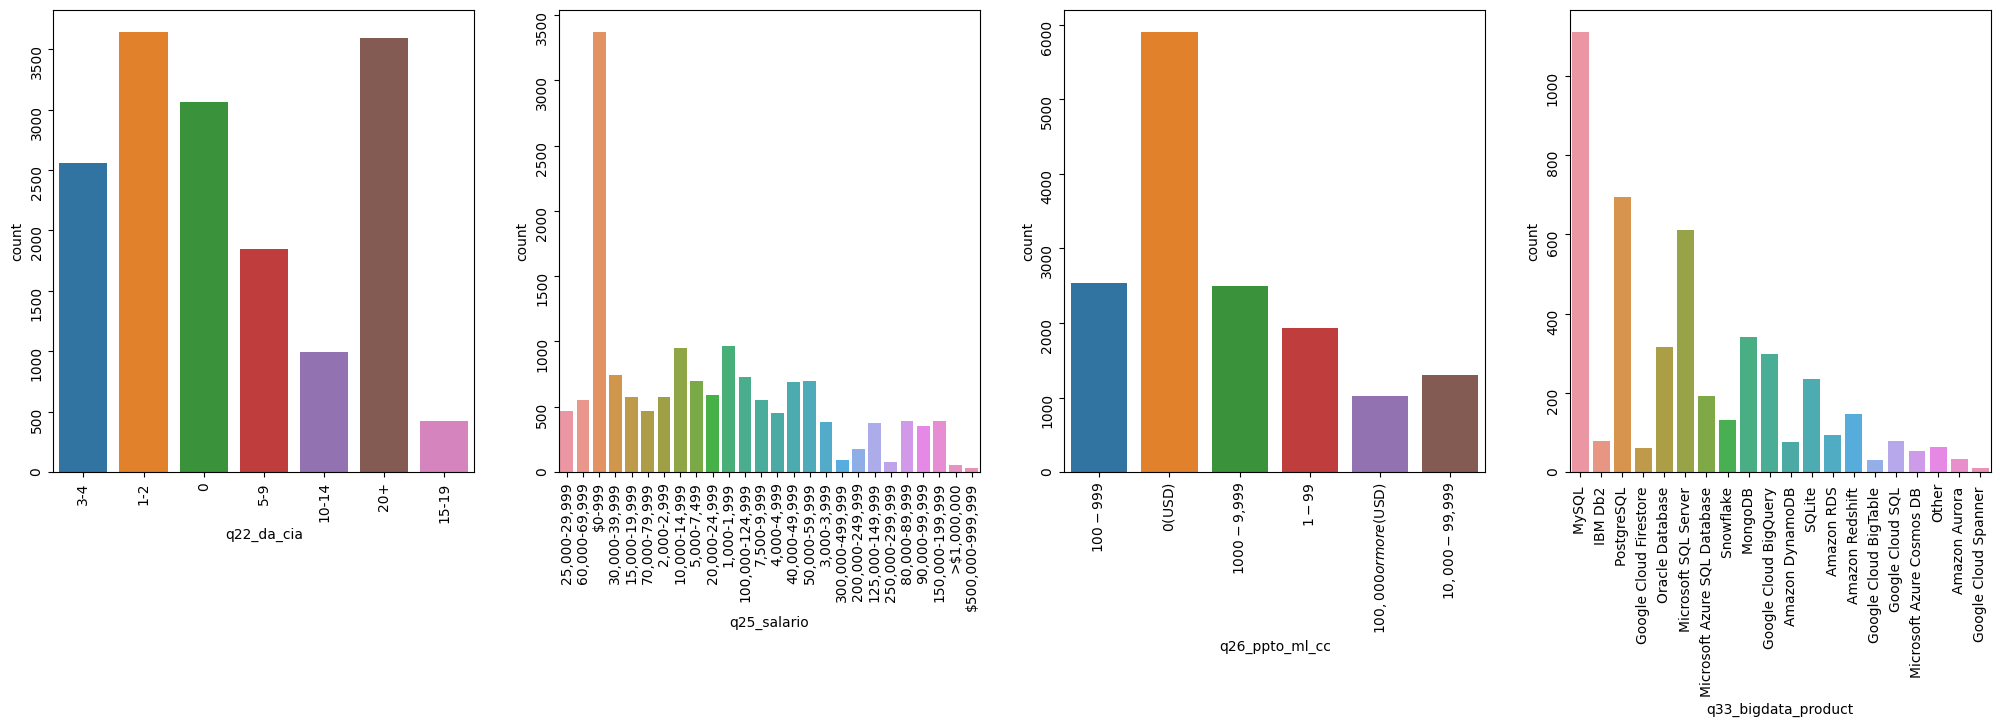

In [58]:
graficar_countrplot (df_categoricas,categoricas3)

In [ ]:
# Pendiente de hacer
def countrplot_columna (df,lista):

    df_lista = df[lista]

    fig, axes = plt.subplots(1, len(lista), figsize=(25,6))

    for ax in fig.axes:
        ax.tick_params(labelrotation=90)

    for i in range(len(df_lista.columns)):
        sns.countplot(x = df_lista.columns[i], data = df, ax=axes[i]); 
    
    plt.show();
    
    return plt.savefig(),

In [52]:
categoricas = list(df_categoricas.columns[0:4])
categoricas

['q1_edad', 'q2_genero', 'q3_país', 'q4_educacion']

In [41]:
categoricas2 = list(df_categoricas.columns[5:9])
categoricas2

['q8_l_recomendado',
 'q11_tipo_plataforma',
 'q20_i_actual',
 'q21_tamanio_cia',
 'q22_da_cia']

In [54]:
categoricas3 = list(df_categoricas.columns[10:15])
categoricas3

['q22_da_cia', 'q25_salario', 'q26_ppto_ml_cc', 'q33_bigdata_product']

## OJO pais en horizontal